# This notebook trains a Simple Neural Network to predict if a patient has Diabetes or not

In [44]:
#Import the Libraries
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import StandardScaler
import pandas as pd
import torch
torch.set_printoptions(sci_mode=False)


# Step 1 : Get your data

In [65]:
diabetes_data = pd.read_csv("diabetes.csv")

In [67]:
diabetes_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
diabetes_data_exam = diabetes_data[["Glucose","Insulin","Outcome"]]

In [4]:
diabetes_data_exam[0:3]

,Glucose,Insulin,Outcome
0,148,0,1
1,85,0,0
2,183,0,1


# Step 2:  Divide Data into training and testing

In [5]:
training = diabetes_data_exam[0:2]
testing = diabetes_data_exam[2:3]

In [6]:
training_X = training[["Glucose","Insulin"]]
training_Y = training[["Outcome"]]

testing_X = testing[["Glucose","Insulin"]]
testing_Y = testing[["Outcome"]]

In [7]:
training

,Glucose,Insulin,Outcome
0,148,0,1
1,85,0,0


In [8]:
testing

,Glucose,Insulin,Outcome
2,183,0,1


# Define A Neural Network Model

 -  Remember : A neural network is just a network of matrix multiplication
![title](imm.png)

In [26]:
F = 2
C = 2
neural_network  = nn.Linear(F,C)



In [27]:
neural_network.weight

Parameter containing:
tensor([[-0.2825, -0.2286],
        [ 0.3347,  0.3173]], requires_grad=True)

In [10]:
sample  = np.array(training_X.iloc[0])
sample = torch.from_numpy(sample)
sample = sample.type(torch.FloatTensor)

In [11]:
neural_network_prediction = neural_network(sample)

In [12]:
neural_network_prediction

tensor([69.7873, 72.5331], grad_fn=<AddBackward0>)

# Step 4 : Use a loss function

## Step 4a : Covert Nueral Network Scores to Probabilities

In [13]:

softmax_function = nn.Softmax(dim=0)
neural_network_prediction_probabilities =  softmax_function(neural_network_prediction)

In [14]:
neural_network_prediction_probabilities

tensor([0.0603, 0.9397], grad_fn=<SoftmaxBackward>)

## Step 4b : Calculate Loss

In [15]:
loss = nn.CrossEntropyLoss()

In [16]:
real_value = int(training_Y.iloc[0])
real_value = torch.tensor(real_value)
real_value =real_value.reshape(1)
neural_network_prediction = neural_network_prediction.reshape(1,2)

In [17]:
real_value

tensor([1])

In [18]:
neural_network_prediction

tensor([[69.7873, 72.5331]], grad_fn=<ViewBackward>)

In [21]:
loss_output = loss(neural_network_prediction,real_value)

In [22]:
loss_output

tensor(0.0622, grad_fn=<NllLossBackward>)

# Step 5: Use an Optimizer 
![title](optim.png)

In [24]:
optimizer = optim.SGD(neural_network.parameters(), lr=0.001, momentum=0.9)
optimizer.step()

# REPEAT FOR SAMPLE 2

# Test

In [45]:
test_sample  = np.array(testing_X.iloc[0])
test_sample = torch.from_numpy(test_sample)
test_sample = test_sample.type(torch.FloatTensor)

In [46]:
test_sample

tensor([183.,   0.])

In [47]:
test_sample_scores = neural_network(test_sample)

In [48]:
test_sample_scores

tensor([ 27.0109, 114.4620], grad_fn=<AddBackward0>)

In [50]:
test_sample_scores_probabilities =  softmax_function(test_sample_scores)

In [51]:
test_sample_scores_probabilities

tensor([    0.0000,     1.0000], grad_fn=<SoftmaxBackward>)

In [28]:
#Just a comment added
diabetes_data = pd.read_csv("diabetes.csv")
diabetes_data.head()
Y = diabetes_data["Outcome"]
del diabetes_data['Outcome']
X = diabetes_data
Y =Y.to_frame()


In [29]:
diabetes_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [54]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


## Prepare a Pytorch DataLoader 

In [45]:
class Training_DataSet(Dataset):
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        features = self.x.iloc[idx]
        target = self.y.iloc[idx]
        features = np.array([features])
        features = torch.from_numpy(features)
        features = features.float().squeeze()
        target = np.array([target])
        target = torch.from_numpy(target)
        target = target.float().squeeze(dim=1)
        sample = {"features": features, "target": target}
        return sample

In [46]:
transformed_dataset = Training_DataSet(x=X,y=Y)

In [47]:
#Print some Data
for i in range(len(transformed_dataset)):
    sample = transformed_dataset[i]

    print(i, sample['features'].shape,sample['target'].shape)

    if i == 3:
        break

0 torch.Size([8]) torch.Size([1])
1 torch.Size([8]) torch.Size([1])
2 torch.Size([8]) torch.Size([1])
3 torch.Size([8]) torch.Size([1])


# Neural Network Class

In [48]:
#Create a simple Neural Network
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.batch_norm = torch.nn.BatchNorm1d(8)
        self.fc1 = nn.Linear(8,128)
        self.fc2 = nn.Linear(128,2)
        
        
    def forward(self,x):
        
        x = self.batch_norm(x)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x
        

# Definig the optimizer and loss function

In [49]:
net = Net()
trainloader = torch.utils.data.DataLoader(transformed_dataset,batch_size=4, shuffle=False,num_workers=0)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

## Train the Network

In [50]:
loss_array = []
correct = 0
import torch.nn.functional as F
torch.set_printoptions(sci_mode=True)
accuracy_array = []
for epoch in range(11):
    running_loss = 0
    for data in trainloader:
        features , target = data['features'],data['target']
        target = target.squeeze()
        target = target.type('torch.LongTensor')
        optimizer.zero_grad()
        outputs = net(features)
        outputs = outputs.squeeze()
        _, predictions = torch.max(outputs,1)
        correct += (predictions == target).sum().item()
        loss = criterion(outputs,target)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()  
        
    loss_array.append(running_loss / len(trainloader))

    print("Epoch: {}/ 10.. ".format(epoch+1),
          "Training Loss: {:.3f}.. ".format(running_loss/len(trainloader)))
    print("Accuracy  %d %%" % (100*correct/len(X)))
    correct = 0
    total = 0
print("Finished training")

Epoch: 1/ 10..  Training Loss: 0.596.. 
Accuracy  65 %
Epoch: 2/ 10..  Training Loss: 0.544.. 
Accuracy  73 %
Epoch: 3/ 10..  Training Loss: 0.534.. 
Accuracy  73 %
Epoch: 4/ 10..  Training Loss: 0.529.. 
Accuracy  73 %
Epoch: 5/ 10..  Training Loss: 0.525.. 
Accuracy  73 %
Epoch: 6/ 10..  Training Loss: 0.522.. 
Accuracy  73 %
Epoch: 7/ 10..  Training Loss: 0.520.. 
Accuracy  73 %
Epoch: 8/ 10..  Training Loss: 0.518.. 
Accuracy  73 %
Epoch: 9/ 10..  Training Loss: 0.516.. 
Accuracy  72 %
Epoch: 10/ 10..  Training Loss: 0.514.. 
Accuracy  73 %
Epoch: 11/ 10..  Training Loss: 0.512.. 
Accuracy  73 %
Finished training


Text(0, 0.5, 'Neural Network Loss')

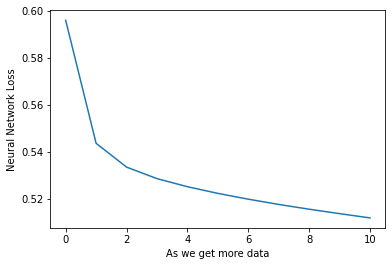

In [53]:
from matplotlib import pyplot as plt
plt.plot(loss_array)
plt.xlabel("As we get more data")
plt.ylabel("Neural Network Loss")

# Machine Learning with Scikit-Learn

In [69]:
import sklearn
import sklearn.preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import svm

# Get Your Data

In [ ]:
df = pd.read_csv("diabetes.csv")

# Split Data into training and testing

In [ ]:
# Splitting the dataset into training and testing sets.
x = df.iloc[:, :-2]
y = df.iloc[:, -1]
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0, test_size = 0.2)

# Train 

In [70]:
clf = svm.SVC(kernel='rbf')
clf.fit(x_train,y_train)

# TEST

In [ ]:
y_pred = clf.predict(x_test)

# Get Accuracy

In [74]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7987012987012987
